# Chirp signal

In [1]:
from scipy.signal import chirp, spectrogram
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tend = 60
t = np.arange(0, tend, 0.01)
f0 = 0.05
f1 = 0.5
t1 = 30
y = chirp(t, f0, t1, f1, method='linear', phi=0)

omega = f0 + t/tend*(f1 - f0)
ytest = np.cos(2*np.pi*omega*t)

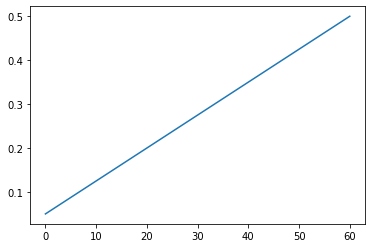

In [3]:
plt.plot(t, omega)

matches with test! [ True  True  True ... False False False]


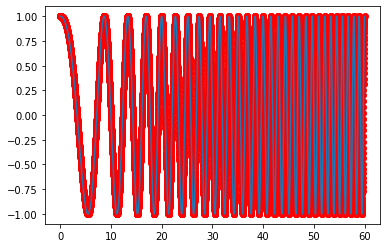

In [4]:
plt.plot(t,y)
plt.scatter(t, ytest, c = 'r')

print("matches with test!", np.equal(y, ytest))

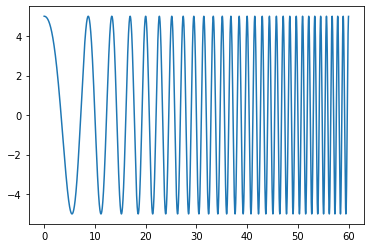

dy[0] : -4.3193527247964436e-07, dy[-1] : 0.0004655226883356067
0.0051832598733001865


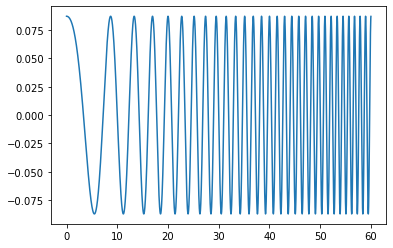

In [5]:
Amp = 5
ydegree = y*Amp
# dy = np.gradient(ydegree)

# print("dy[0] : {}, dy[-1] : {}".format(dy[0], dy[-1]))


plt.plot(t, ydegree)
plt.show()

yscaled = ydegree * np.pi / 180 # Make it radian

plt.plot(t, yscaled)
dy = np.gradient(yscaled)

print("dy[0] : {}, dy[-1] : {}".format(dy[0], dy[-1]))

print(np.max(dy))

plt.show()

# Adding IC in front, sinusoidal pitching, f0p05
## The actual result is after ibpm05500

<class 'numpy.float64'>
5500


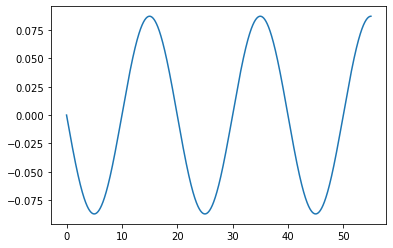

In [6]:
tend = 55

t = np.arange(0, tend, 0.01, dtype = np.float64)
print(type(t[0]))
print(len(t))


ap = 5
fp = 0.05

w = (- ap * np.sin(2*np.pi*fp*t))*np.pi/180

plt.plot(t, w)

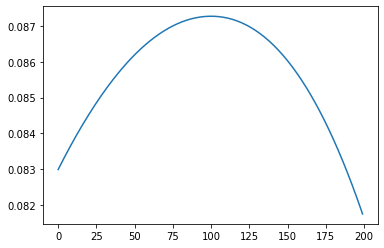

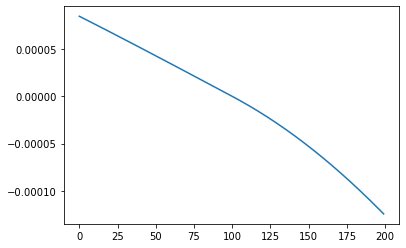

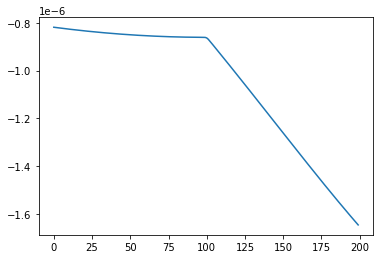

0.0872647400344568 0.087266031957339 0.08726646259971647 0.087266030664444
checking slope
-8.639207971488341
-8.639336733134183
-8.639380229307202


In [7]:
t = np.arange(0, 115, 0.01)

full = np.concatenate((w,yscaled))
plt.plot(full[5400:5600])
# plt.scatter(t[4000], full[4000])
plt.show()

dfull = np.gradient(full)

plt.plot(dfull[5400:5600])
plt.show()

ddfull = np.gradient(dfull)
plt.plot(ddfull[5400:5600])
plt.show()

print(w[-2], w[-1], yscaled[0], yscaled[1])
print("checking slope\n"+'='*20)

print(w[-1] - w[-2]/0.01)
print(yscaled[0] - w[-1]/0.01)
print(yscaled[1] - yscaled[0]/0.01)

In [8]:
time_str = []
w_str = []
dw_str = []

t = np.arange(0, 115, 0.01)

for time, omega, domega in zip(t, full, dfull):
    time_str.append(format(time, '.7e'))
    w_str.append(format(omega, '.7e'))
    dw_str.append(format(domega, '.7e'))
    
path = "/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Mac/Armour R&D/IBPM DNS/Geom File/"
zero = format(0.0, '0.7e')

with open(path + "IC_included_A05_Chirp_L06000.dat", 'w') as file:
    file.write('   ' + str(len(time_str)) + '\n')
    for time, omega, domega in zip(t, full, dfull):
        temp_t = format(time, '.7e')
        temp_w = format(omega, '.7e')
        temp_dw = format(domega, '.7e')
        temp_str = "%16s" % temp_t + "%16s" % zero + "%16s" % zero + "%16s" % temp_w +\
        "%16s" % zero + "%16s" % zero + "%16s" % temp_dw + '\n'
        file.write(temp_str)